# Movie Analysis Report 🎬

- **Dataset: IMDB Movies**
- **Tools: Python, Pandas, Seaborn, Matplotlib** 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import wordcloud as Wordcloud
sns.set(style="whitegrid")

## top 10 movies with most votes or rating

In [15]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\dataset\IMDB-Movie-Data.csv")
top10_movies_rating = df.sort_values(by="Rating", ascending=False).head(10)

display(top10_movies_rating)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
133,134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


In [375]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


## CHECKING DUPLICATES 

In [371]:
df.duplicated(subset="Title").sum()

1

In [377]:
# SOLVING DUPLICATE
unique_titles = df["Title"].value_counts()
df_unique = df[df["Title"].isin(unique_titles[unique_titles == 1].index)]


## FILLING EMPTY CELLS

In [379]:
df["Revenue (Millions)"] = df.groupby("Genre")["Revenue (Millions)"].transform(lambda x: x.fillna(x.median()))
df["Metascore"]=df["Metascore"].fillna(df["Metascore"].median())

## RATING ANALYSIS

In [218]:
# TOP 10 MOVIES BY RATING
top10 = df.sort_values(by="Rating", ascending=False).head(10)

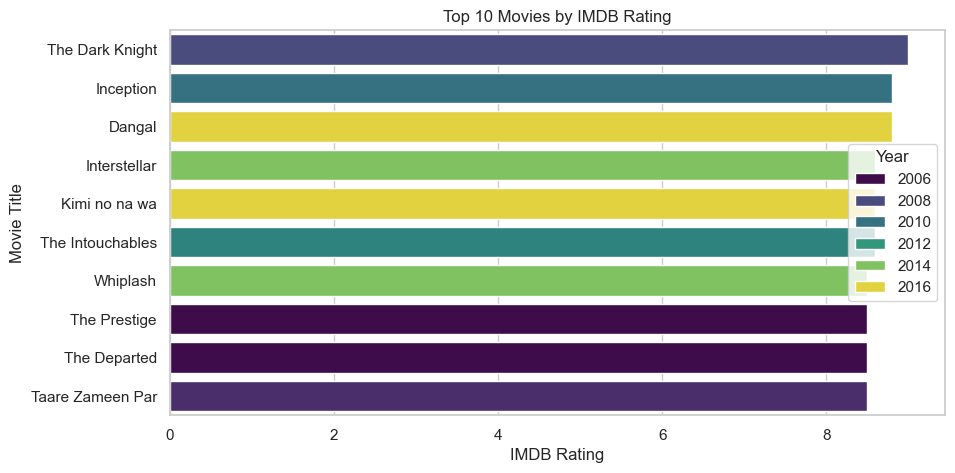

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(data=top10, x="Rating",hue="Year", y="Title", palette="viridis")

plt.xlabel("IMDB Rating")
plt.ylabel("Movie Title")
plt.title("Top 10 Movies by IMDB Rating")
plt.show()


In [222]:
#DATATYPE OF GENRE
df["Genre"].dtype


dtype('O')

In [226]:
df["Genre"]=df["Genre"].astype("string") #DTYPE CHANGE TO STRING
df["Genre"]=df["Genre"].str.split(",")
df_exploded=df.explode("Genre")
df_exploded["Genre"]=df_exploded["Genre"].str.strip()
avg_genres = df_exploded.groupby("Genre")["Rating"].mean().sort_values(ascending=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17892\3544700346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_genres.index, y=avg_genres.values, palette="mako")


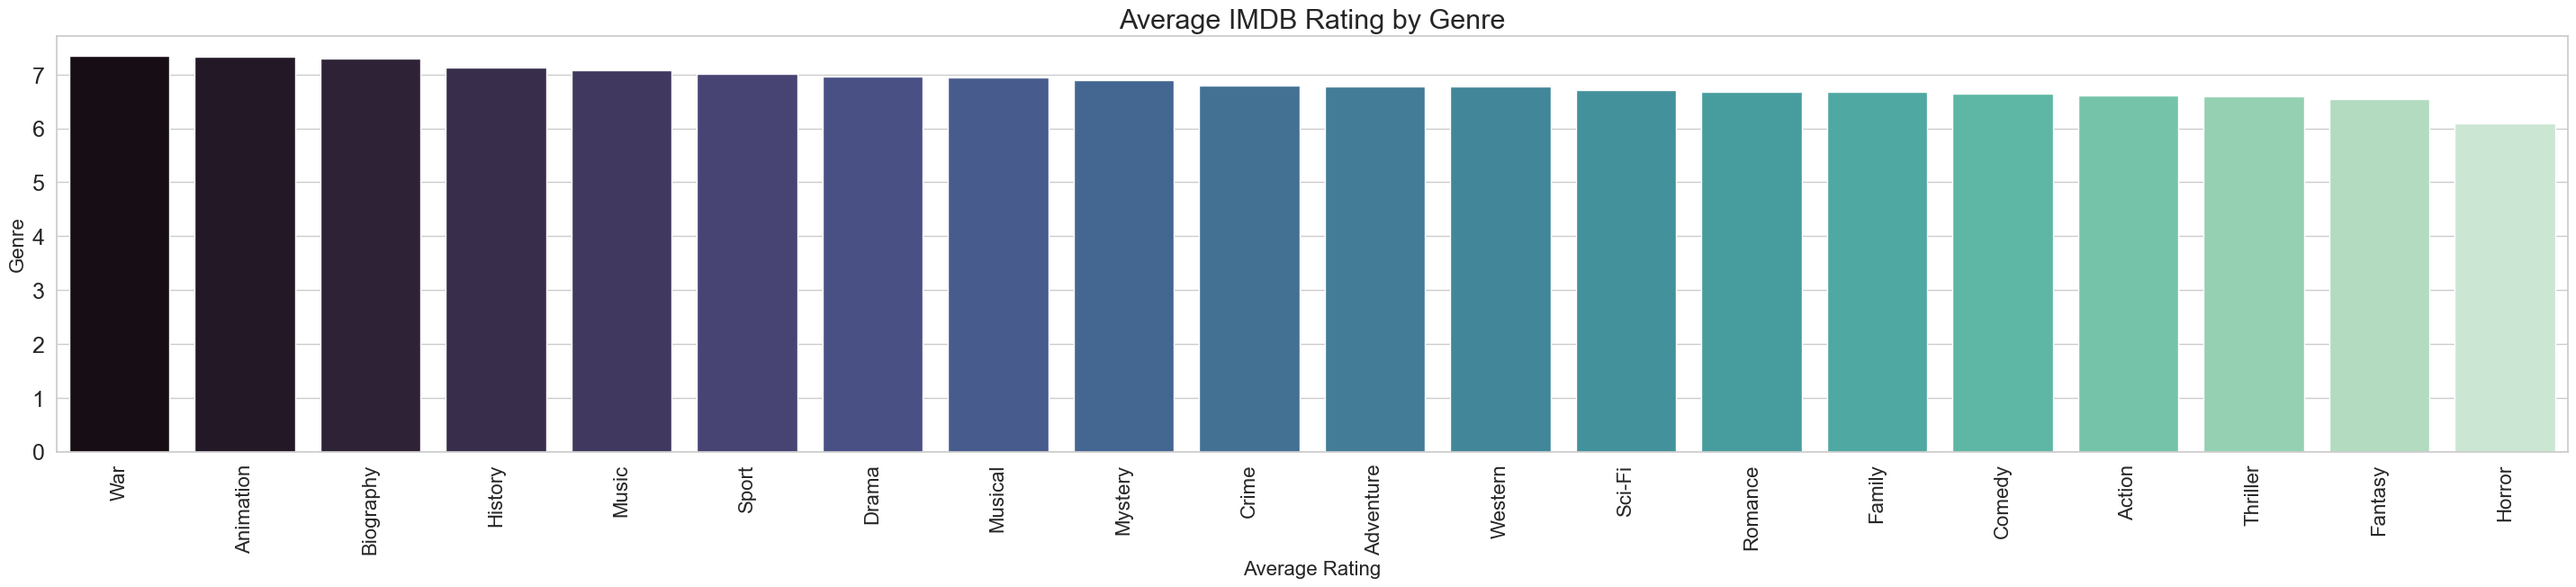

In [228]:
# IMDB RATING BY GENRES
plt.figure(figsize=(36,6))
sns.barplot(x=avg_genres.index, y=avg_genres.values, palette="mako")
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=18)
plt.title("Average IMDB Rating by Genre",fontsize=22)
plt.xlabel("Average Rating",fontsize=16)
plt.ylabel("Genre",fontsize=16)
plt.show()


In [320]:
# TOP 10 ACTORS BY AVG RATING

top_actors = (
    df_exploded.groupby("Actors")["Rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
print("🎬 Top 10 Actors by Average Rating")
display(top_actors.style.background_gradient(cmap="YlGnBu"))


🎬 Top 10 Actors by Average Rating


,Actors,Rating
0,' Fatima Sana Shaikh',8.800000
1,'Sanya Malhotra'],8.800000
2,' Sakshi Tanwar',8.800000
3,['François Cluzet',8.600000
4,' Mackenzie Foy'],8.600000
5,' Anne Le Ny',8.600000
6,['Ryûnosuke Kamiki',8.600000
7,' Aoi Yuki'],8.600000
8,' Mone Kamishiraishi',8.600000
9,' Ryô Narita',8.600000


In [298]:
# TOP DIRECTORS BY AVG RATING

top_directors = (
    df_exploded.groupby("Director")["Rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
print("🎬 Top 10 Directors by Average Rating")
display(top_directors.style.background_gradient(cmap="YlGnBu"))


🎬 Top 10 Directors by Average Rating


,Director,Rating
0,Nitesh Tiwari,8.800000
1,Christopher Nolan,8.680000
2,Olivier Nakache,8.600000
3,Makoto Shinkai,8.600000
4,Aamir Khan,8.500000
5,Florian Henckel von Donnersmarck,8.500000
6,Naoko Yamada,8.400000
7,Damien Chazelle,8.400000
8,Lee Unkrich,8.300000
9,Amber Tamblyn,8.300000


## CORRELATION (METASCORE & RATING)

In [85]:
correlation = df["Metascore"].corr(df["Rating"])
print("Correlation between Metascore and IMDB Rating:", correlation)


Correlation between Metascore and IMDB Rating: 0.6045222996134426


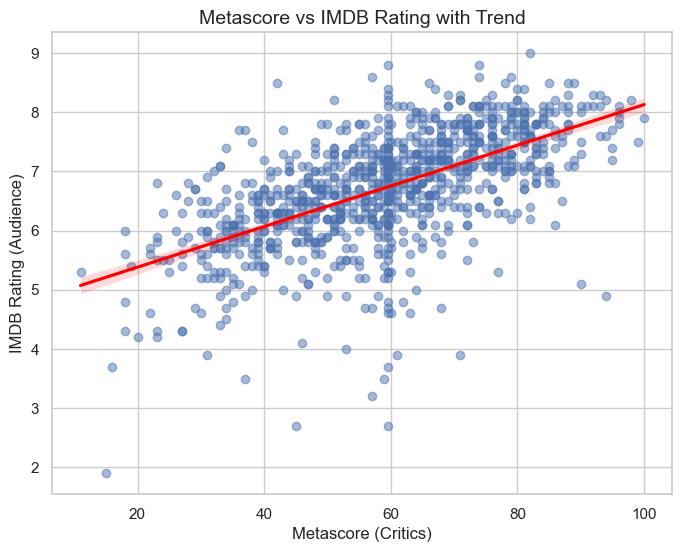

In [91]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="Metascore", y="Rating", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.xlabel("Metascore (Critics)", fontsize=12)
plt.ylabel("IMDB Rating (Audience)", fontsize=12)
plt.title("Metascore vs IMDB Rating with Trend", fontsize=14)
plt.show()


## REVENUES DISTRIBUTION

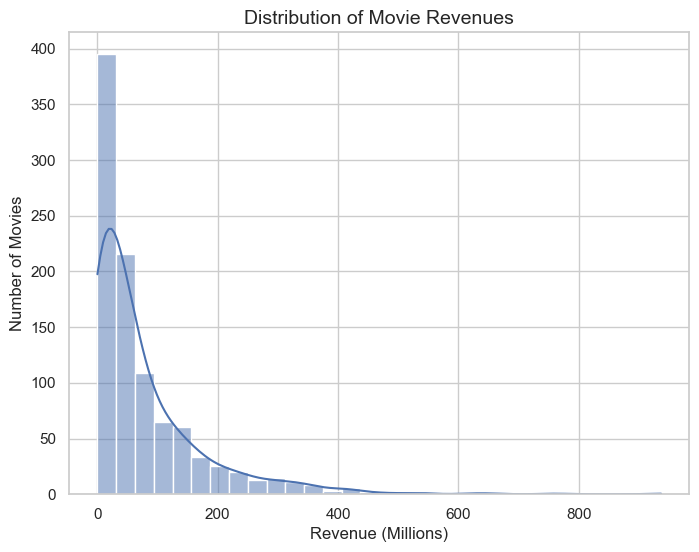

In [101]:
# NO. OF MOVIES AND THEIR REVENUE COLLECTION
plt.figure(figsize=(8,6))
sns.histplot(df["Revenue (Millions)"].dropna(), bins=30, kde=True)

plt.xlabel("Revenue (Millions)", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Distribution of Movie Revenues", fontsize=14)
plt.show()


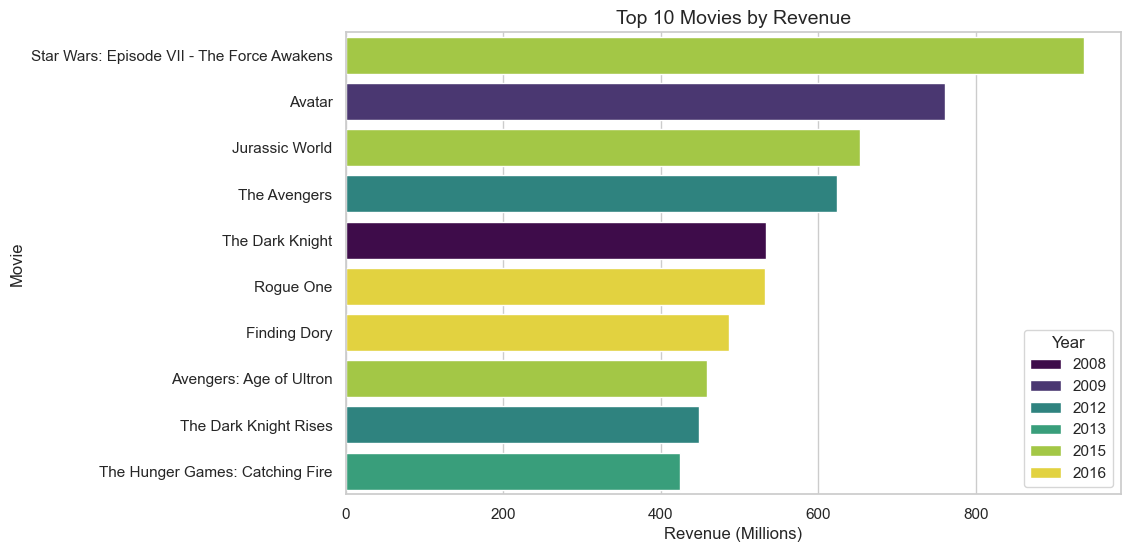

In [105]:
# TOP 10 MOVIES BY REVENUE

top_revenue = df.nlargest(10, "Revenue (Millions)")
plt.figure(figsize=(10,6))
sns.barplot(data=top_revenue, x="Revenue (Millions)", y="Title", palette="viridis",hue="Year")
plt.xlabel("Revenue (Millions)", fontsize=12)
plt.ylabel("Movie", fontsize=12)
plt.title("Top 10 Movies by Revenue", fontsize=14)
plt.show()


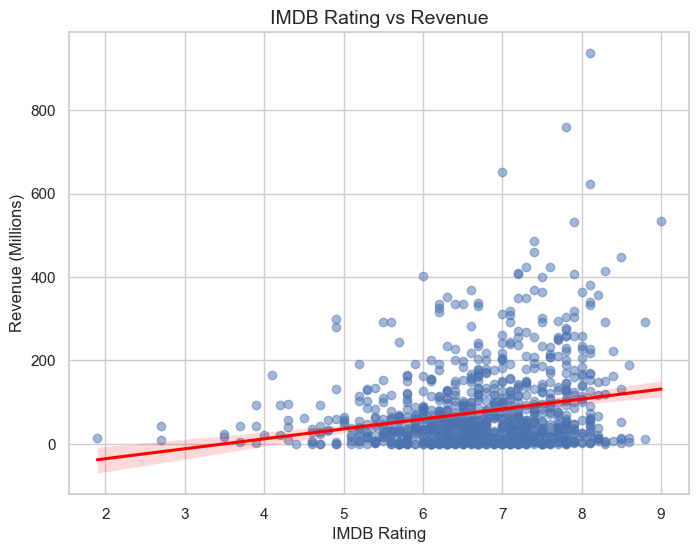

In [123]:
#  IMDB VS REVENUE

plt.figure(figsize=(8,6))
sns.regplot(data=df, x="Rating", y="Revenue (Millions)", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("IMDB Rating")
plt.ylabel("Revenue (Millions)")
plt.title("IMDB Rating vs Revenue", fontsize=14)
plt.show()

In [304]:
# TOP 10 ACTORS AND THEIR REVENUES

from tabulate import tabulate 
top_actors = (df_exploded.groupby("Actors")["Revenue (Millions)"].mean().sort_values(ascending=False).head(10).reset_index())
print("Top 10 Actors by Revenue")
print(tabulate(top_actors, headers="keys", tablefmt="fancy_grid"))


Top 10 Actors by Revenue
╒════╤════════════════════════╤══════════════════════╕
│    │ Actors                 │   Revenue (Millions) │
╞════╪════════════════════════╪══════════════════════╡
│  0 │ ['Daisy Ridley'        │              936.63  │
├────┼────────────────────────┼──────────────────────┤
│  1 │ ' John Boyega'         │              936.63  │
├────┼────────────────────────┼──────────────────────┤
│  2 │ 'Judy Greer']          │              652.18  │
├────┼────────────────────────┼──────────────────────┤
│  3 │ 'Jeremy Renner']       │              623.28  │
├────┼────────────────────────┼──────────────────────┤
│  4 │ ' Domhnall Gleeson']   │              560.135 │
├────┼────────────────────────┼──────────────────────┤
│  5 │ ' Donnie Yen']         │              532.17  │
├────┼────────────────────────┼──────────────────────┤
│  6 │ ' Alan Tudyk'          │              532.17  │
├────┼────────────────────────┼──────────────────────┤
│  7 │ ['Felicity Jones'      │         

In [308]:
# TOP 10 DIRECTORS AND THEIR REVENUES

from tabulate import tabulate 
top_directors = (df_exploded.groupby("Director")["Revenue (Millions)"].mean().sort_values(ascending=False).head(10).reset_index())
print("Top 10 Directors by Revenue")
print(tabulate(top_directors, headers="keys", tablefmt="fancy_grid"))


Top 10 Directors by Revenue
╒════╤═════════════════╤══════════════════════╕
│    │ Director        │   Revenue (Millions) │
╞════╪═════════════════╪══════════════════════╡
│  0 │ James Cameron   │              760.51  │
├────┼─────────────────┼──────────────────────┤
│  1 │ Colin Trevorrow │              652.18  │
├────┼─────────────────┼──────────────────────┤
│  2 │ Joss Whedon     │              541.135 │
├────┼─────────────────┼──────────────────────┤
│  3 │ Lee Unkrich     │              414.98  │
├────┼─────────────────┼──────────────────────┤
│  4 │ Gary Ross       │              408     │
├────┼─────────────────┼──────────────────────┤
│  5 │ Chris Buck      │              400.74  │
├────┼─────────────────┼──────────────────────┤
│  6 │ Chris Renaud    │              368.31  │
├────┼─────────────────┼──────────────────────┤
│  7 │ Gareth Edwards  │              366.415 │
├────┼─────────────────┼──────────────────────┤
│  8 │ Tim Miller      │              363.02  │
├────┼──────

## DESCRIPTION ANALYSIS

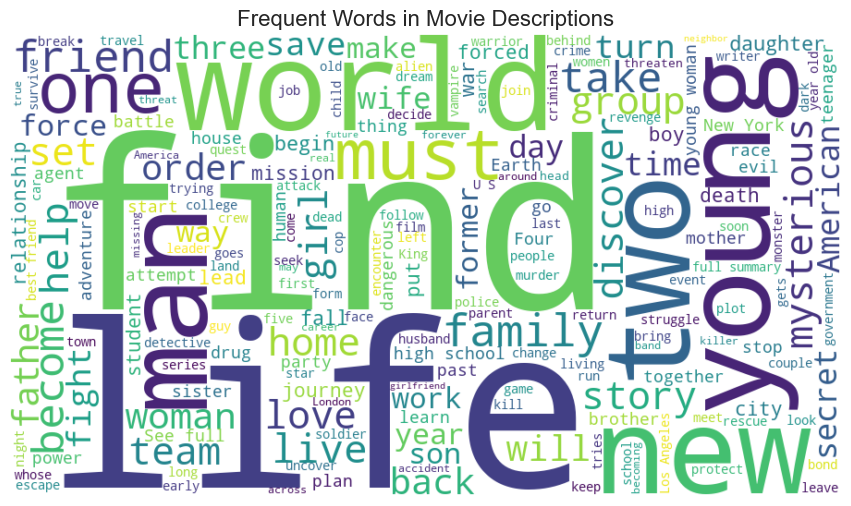

In [359]:
from wordcloud import WordCloud
text = " ".join(df["Description"].dropna())
wc = WordCloud(width=900, height=500, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Frequent Words in Movie Descriptions", fontsize=16)
plt.show()


## INSIGHTS


### DATASET OVERVIEW


-*Total movies* = 999<br>
-*Time period covered* = 2006 to 2016<br>
-*Number of unique director* = 644<br>
-*Number of actors* = 996<br>
-*Number of Genres* = 207

## Rating insights

*Average IMDB rating across all movies* = 6.72<br>
*Average IMDB rating for top 10 movies* = 8.64

## Genre

*Highest rating genre* = **War**(Rating-7.35)<br>
*Genre with most movies* = **Drama**(513 Movies)

## Revenue

*Average movie revenue* = 82.95 M<br>
*Average of top 10 highest movies revenue* = 124.265M

## Runtime

*Average runtime*= 113.17 Minutes<Br>
*Most of the movies fall in 90-120 min category*

## Metascore vs IMDB Rating 

*Movies with higher Metascores generally have higher IMDB ratings, showing a moderate positive correlation (~0.6).*

## Actors & Director

*The most prolific director in the dataset is **Ridley Scott** (6 movies), followed by **Clint Eastwood** (5 movies).* <br>
*Among directors with at least 3 movies, **Christopher Nolan** has the highest average rating (~8.6).* <br>
***Mark Wahlberg** and **Bradley Cooper** are among the most frequent actors in this dataset, each appearing in 8–9 movies.*

**Drama and Action are the most common genres.** <br>
**Revenue is not always linked with IMDB ratings.** <br>
**Top-rated movies are not always the most commercially successful.**